<a href="https://colab.research.google.com/github/oymin2001/DataScience/blob/main/SupportVectorMachine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 개념

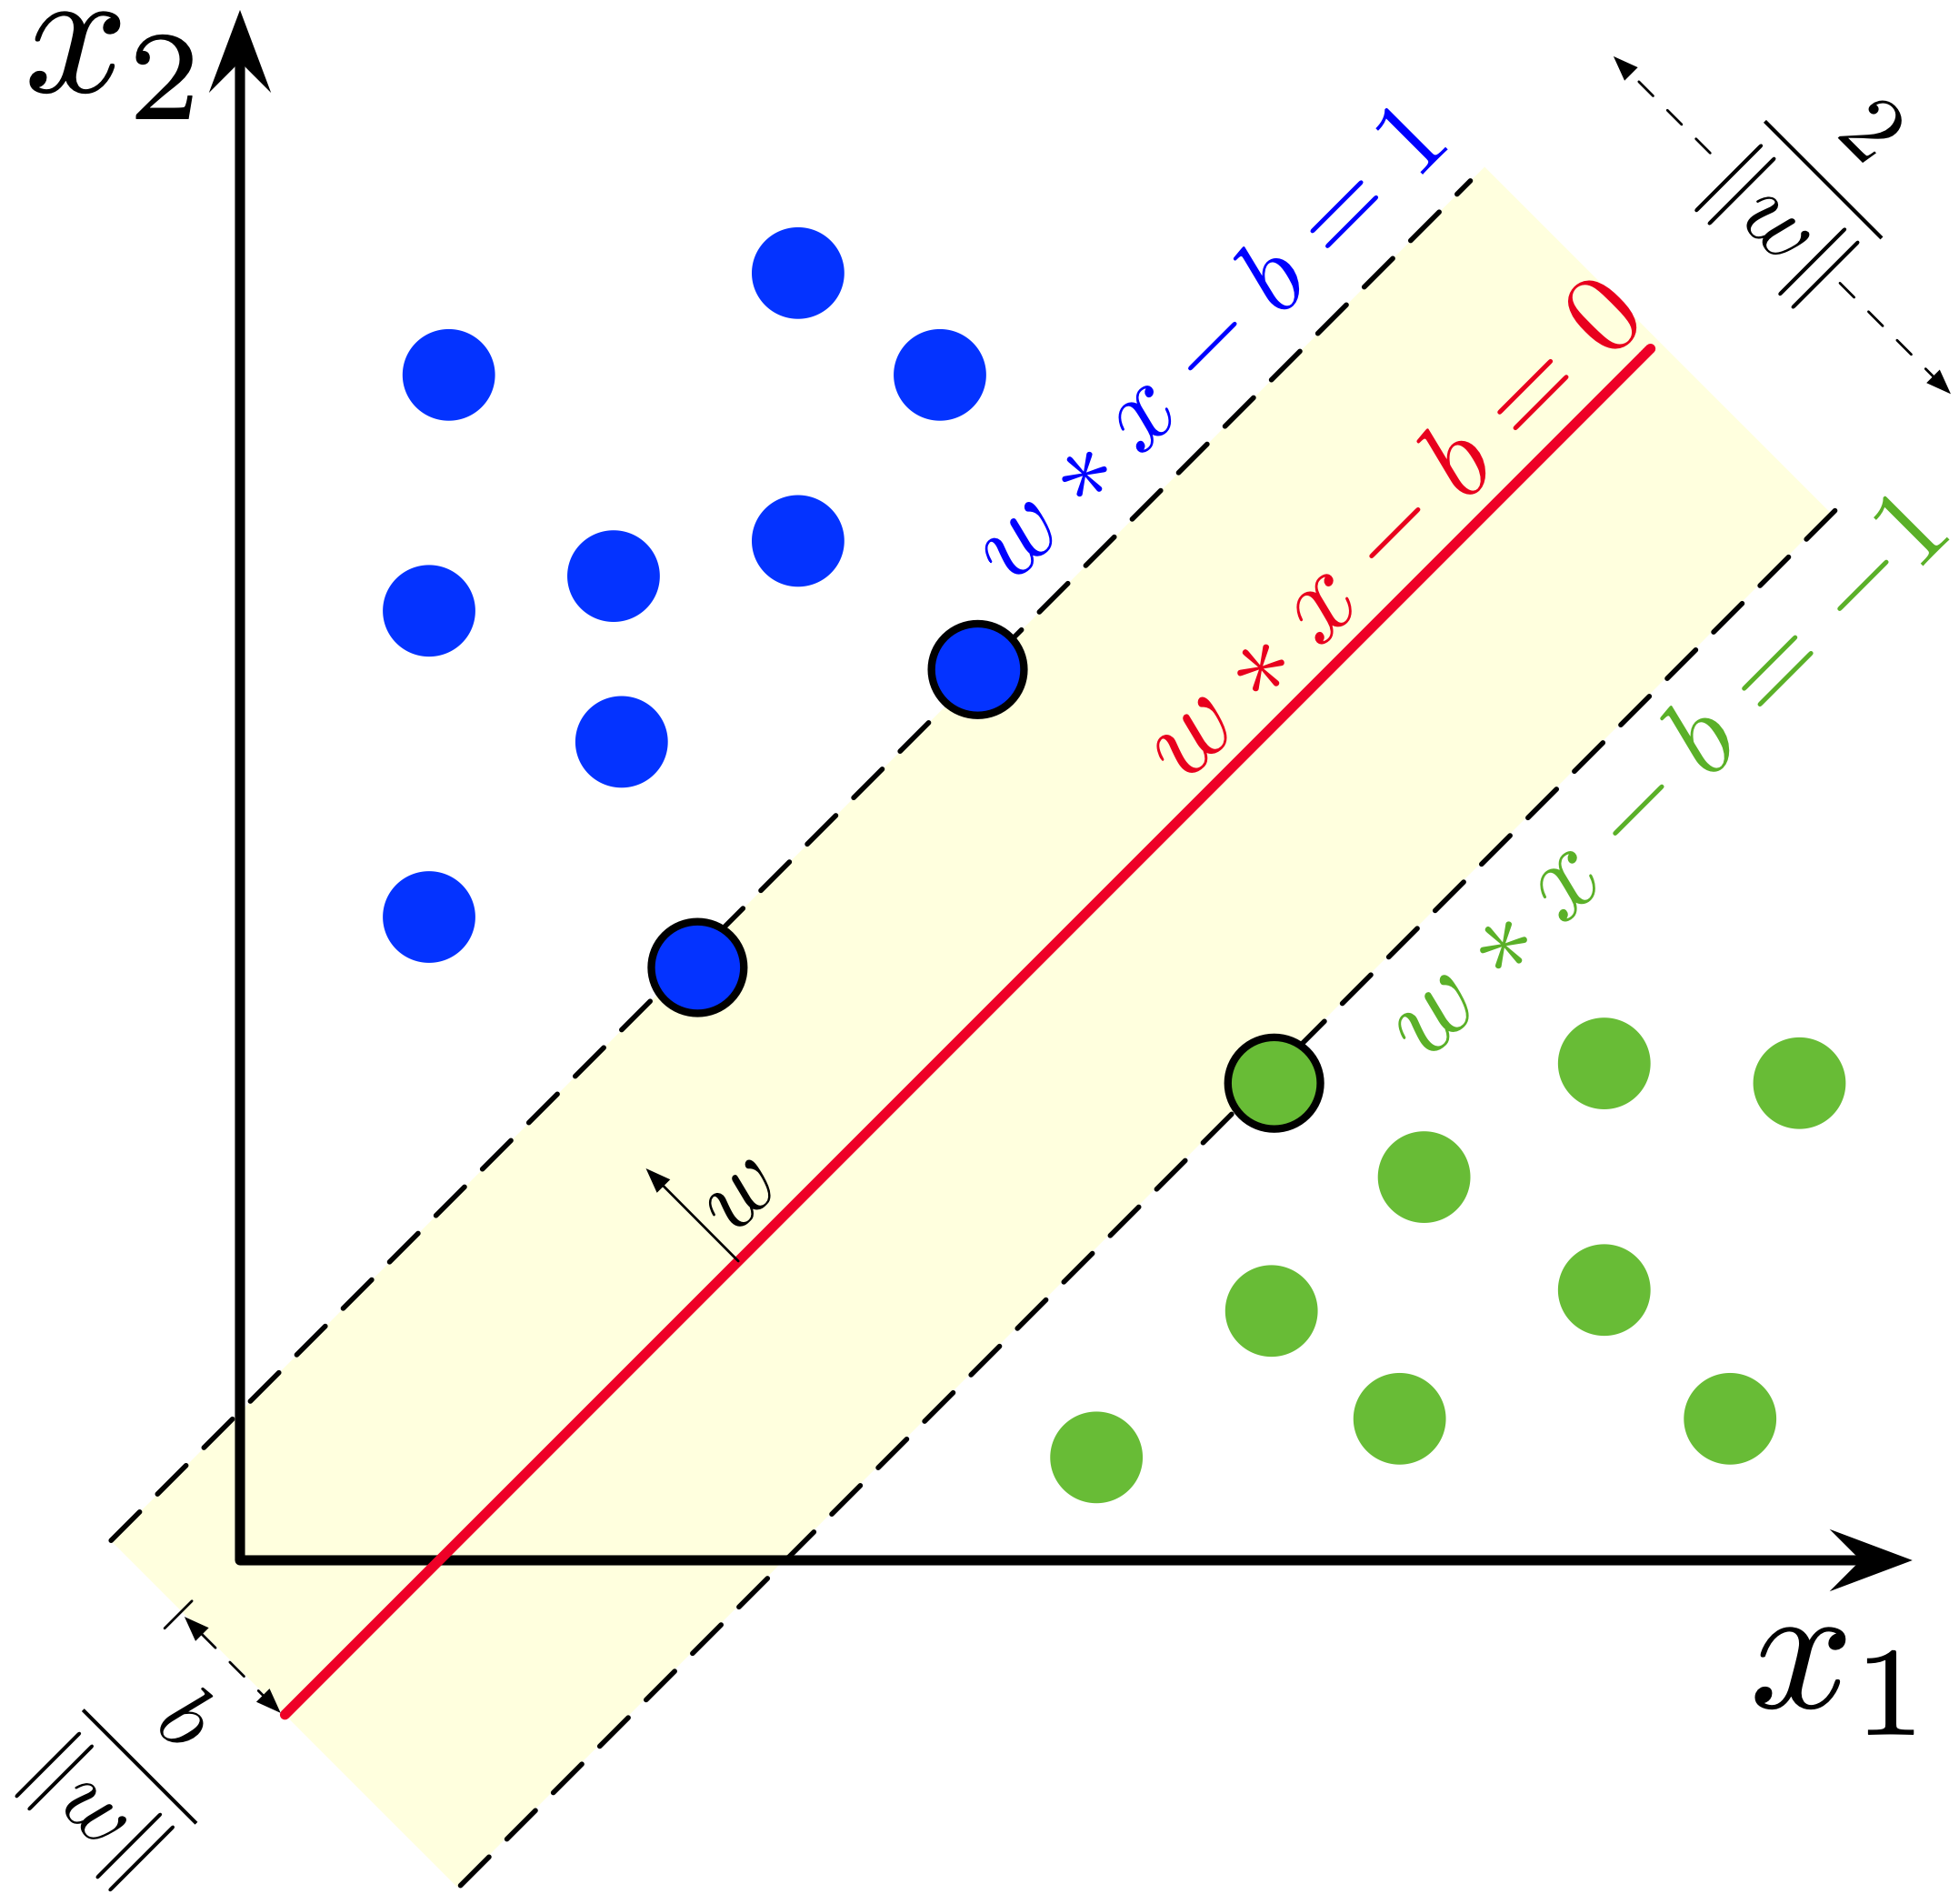

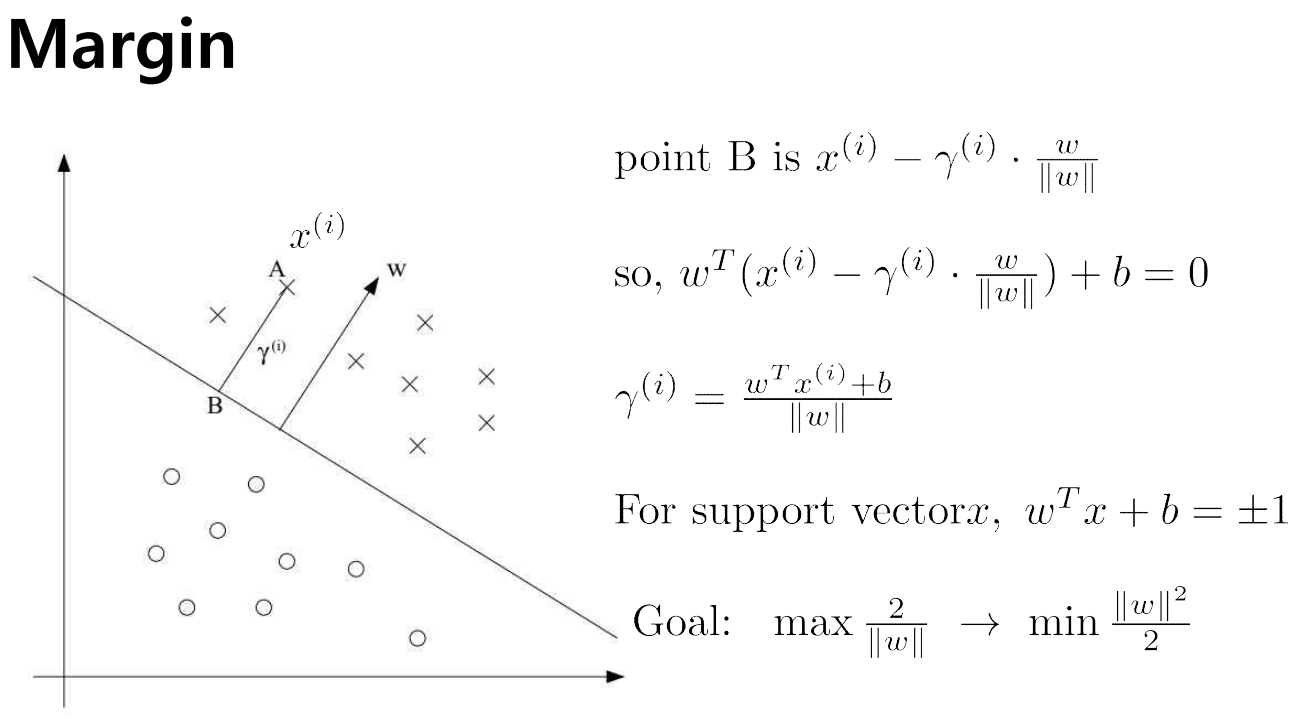

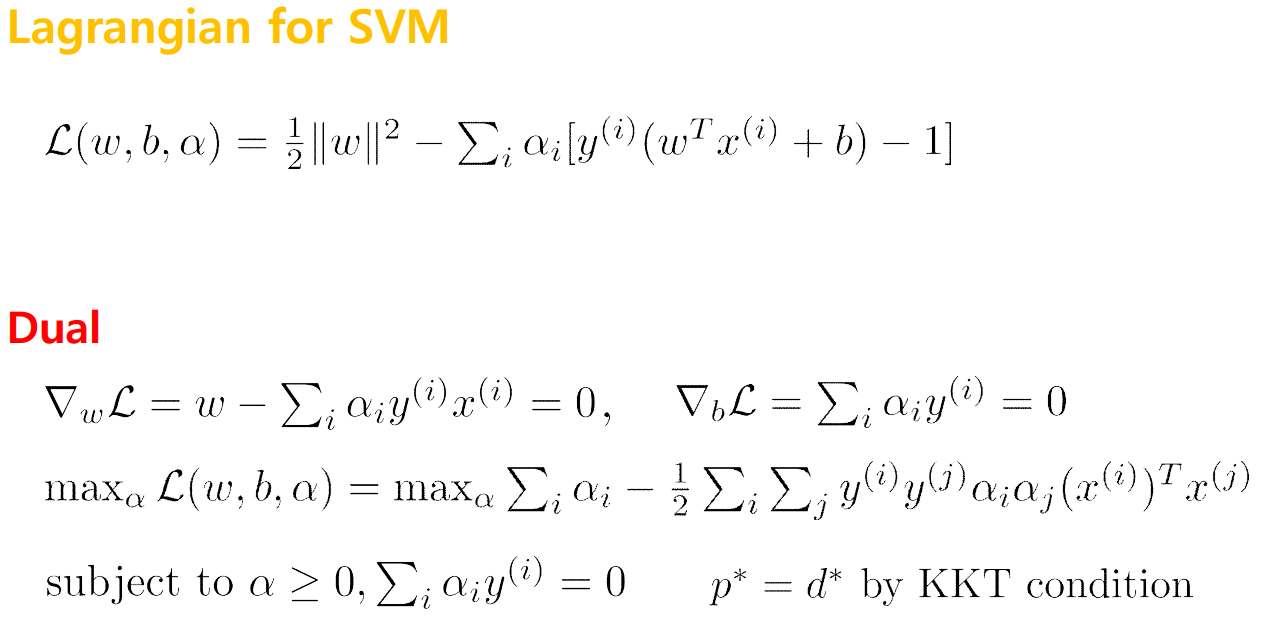

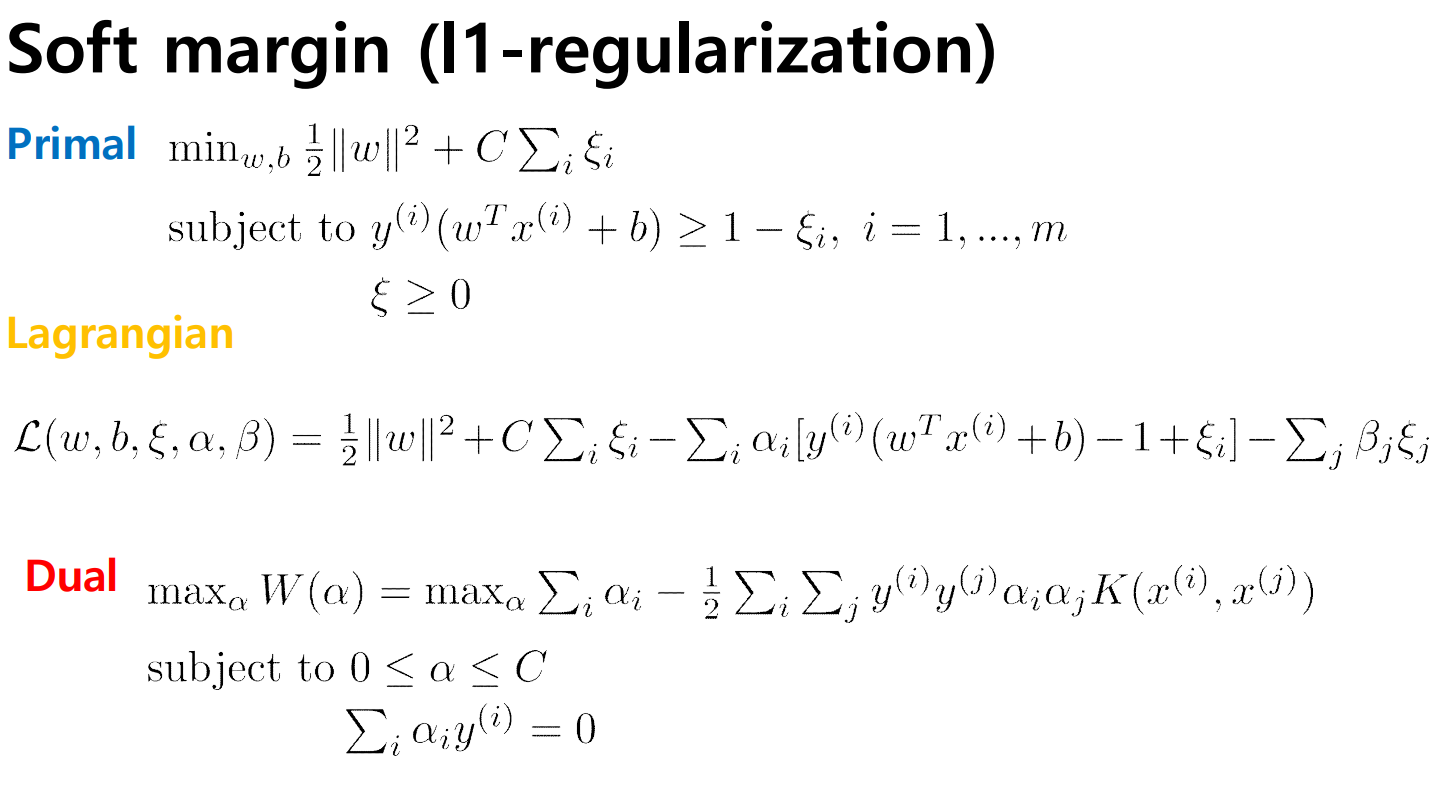

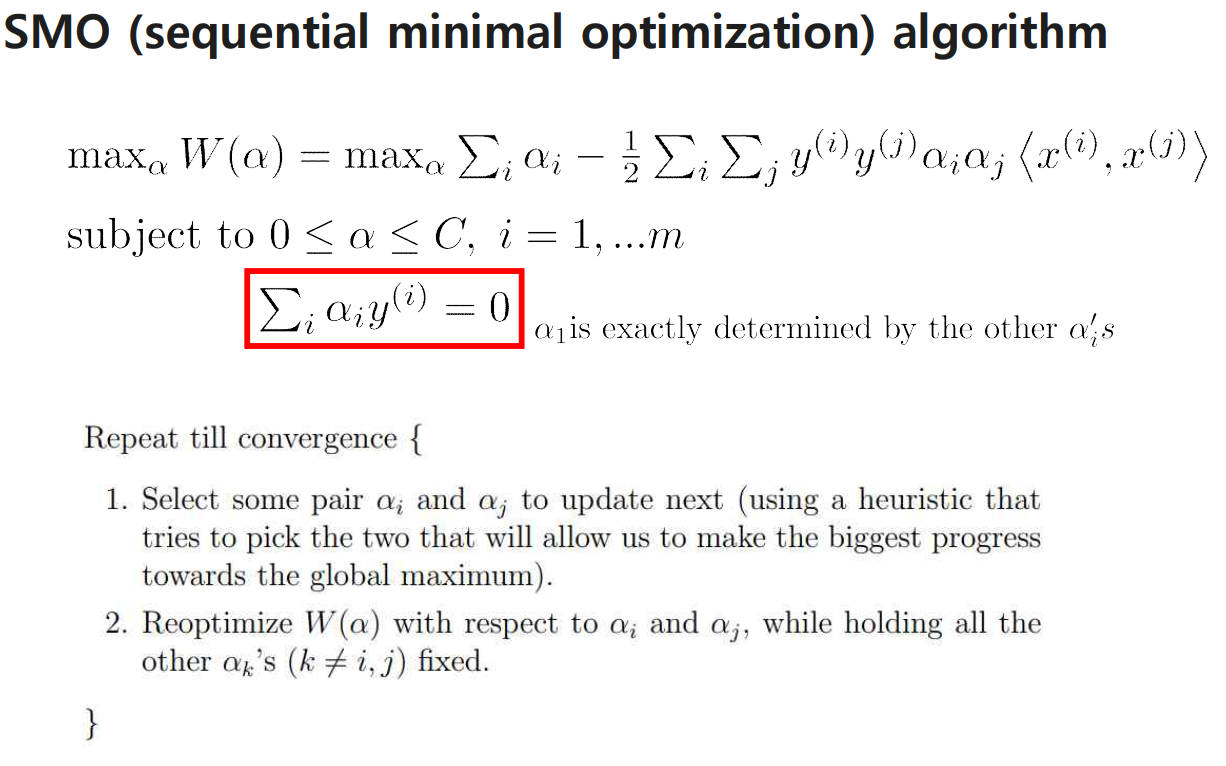

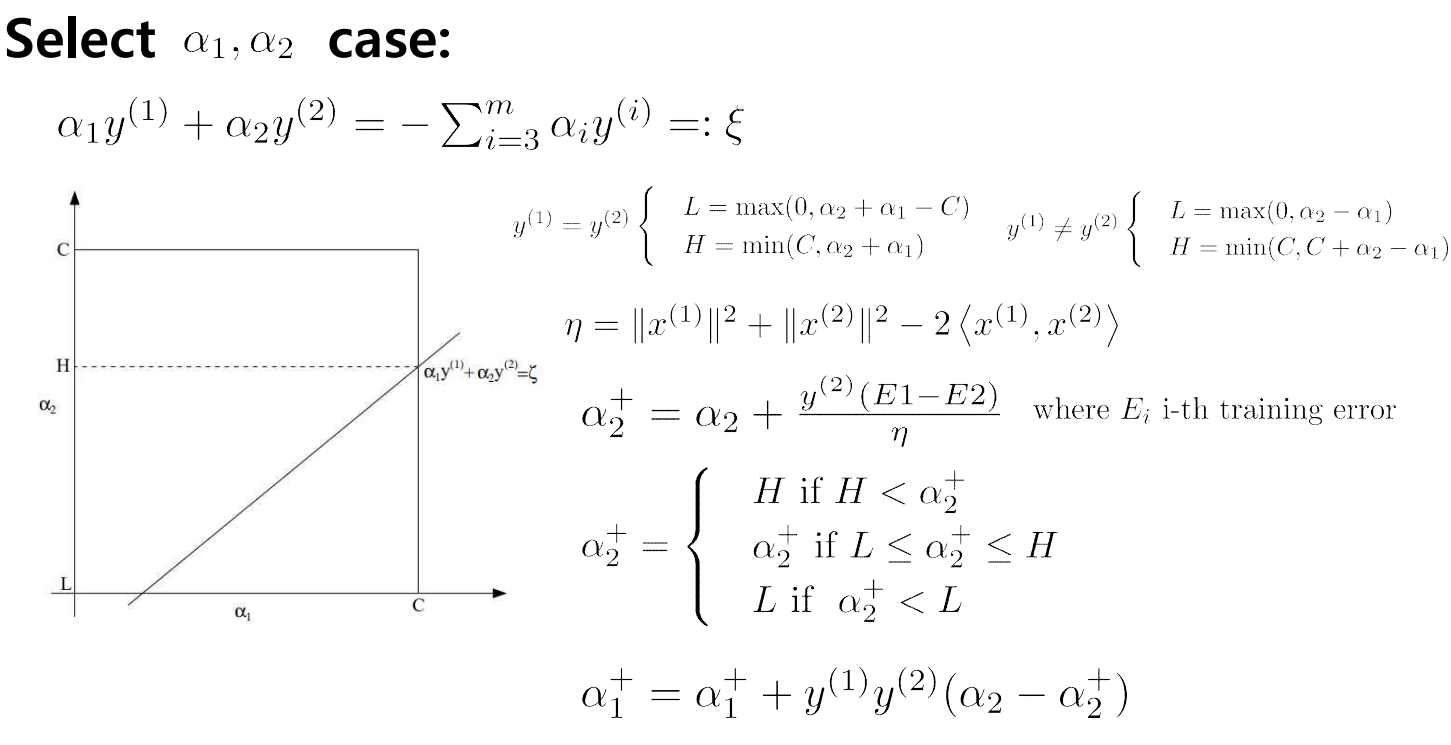

# 코드 구현

In [ ]:
import numpy as np

class SVM(object): ###### 커널 함수 구현해야함
    def __init__(self, max_iter = 10000, C=1.0):
        self.max_iter = max_iter
        self.C = C

    def fit(self, X, y):
        m, n = X.shape
        alpha = np.zeros(m)

        for _ in range(self.max_iter):
            alpha_prev = np.copy(alpha)
            for j in range(0, m):
                i =  np.random.randint(0, m)
                x_i, x_j, y_i, y_j = X[i,:], X[j,:], y[i], y[j]
                alpha_new_i, alpha_new_j = alpha[i], alpha[j]
                (L, H) = self.compute_bound(self.C, alpha_new_i, alpha_new_j,
                                            y_i, y_j)
                eta = x_i.dot(x_i.T) + x_j.dot(x_j.T) - 2*x_i.dot(x_j)

                self.w = X.T.dot(alpha*y)
                self.b = np.mean((y-self.w.T.dot(X.T)))

                h_i = self.h(x_i,self.w,self.b)
                h_j = self.h(x_j,self.w,self.b)

                E_i = h_i - y_i
                E_j = h_j - y_j

                alpha[j] = alpha_new_j + float(y_j*(E_i - E_j)) / (eta+1e-8)
                alpha[j] = max(alpha[j],L)
                alpha[j] = min(alpha[j],H)

                alpha[i] = alpha_new_i + y_i*y_j * (alpha_new_j - alpha[j])

        self.b = np.mean(y-self.w.T.dot(X.T))
        self.w = X.T.dot(alpha*y)
        alpha_idx = np.where(alpha > 0)[0]
        support_vectors = X[alpha_idx, :]

    def compute_bound(self, C, alpha_new_j, alpha_new_i, y_j, y_i):
        if(y_i != y_j):
            return (max(0, alpha_new_j - alpha_new_i), min(C, C - alpha_new_i + alpha_new_j))
        else:
            return (max(0, alpha_new_i + alpha_new_j - C), min(C, alpha_new_i + alpha_new_j))

    def h(self, X, w, b):
        return np.sign(np.dot(w.T, X.T) + b).astype(int) # return 1 if positive, -1 if negative, 0

    def predict(self, X):
        return self.h(X, self.w, self.b)

In [ ]:
from sklearn.datasets import load_iris

data = load_iris()
X =data.data
y = data.target
X = X[y!=2]
y = y[y!=2]

model = SVM()
model.fit(X, y)

y_pred = model.predict(X)
y[y==0] = -1 #################
np.sum(y == y_pred) / len(y)

0.96